<a href="https://colab.research.google.com/github/Divya-Tallur/Time-Series-Analysis/blob/main/ARIMA_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms

In [6]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline.columns

Index(['Month', 'Thousands of Passengers'], dtype='object')

In [7]:
df_airline.isnull().sum()

,0
Month,0
Thousands of Passengers,1


In [8]:
df_airline.dropna(inplace=True,axis=0)

In [9]:
df_airline.isnull().sum()

,0
Month,0
Thousands of Passengers,0


In [10]:
df_airline.dtypes

,0
Month,object
Thousands of Passengers,float64


In [12]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [13]:
df_airline.dtypes

,0
Month,datetime64[ns]
Thousands of Passengers,float64


In [15]:
df_airline.set_index('Month',inplace=True)


KeyError: "None of ['Month'] are in the columns"

In [16]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

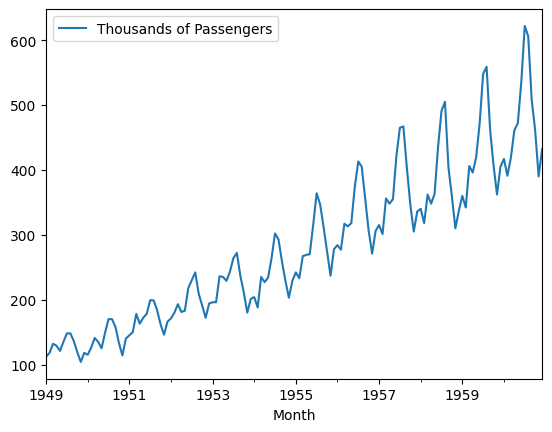

In [17]:
df_airline.plot()


In [18]:
df_airline.columns

Index(['Thousands of Passengers'], dtype='object')

In [21]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_airline['Thousands of Passengers'])
p_value=result[1]
print(p_value)

0.991880243437641


In [23]:
# Differencing technique to make it stationary
df_airline['passengers first difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)
df_airline.head()

,Thousands of Passengers,passengers first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [27]:
df_airline.dropna(inplace=True)
adfuller(df_airline['passengers first difference'])[1]


0.05421329028382478

<Axes: xlabel='Month'>

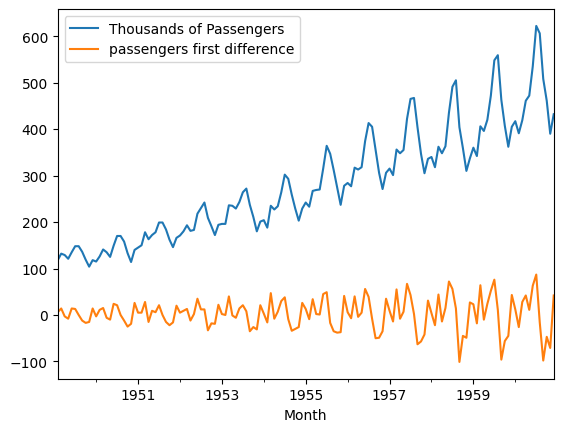

In [28]:
df_airline[['Thousands of Passengers','passengers first difference']].plot()

<Axes: xlabel='Month'>

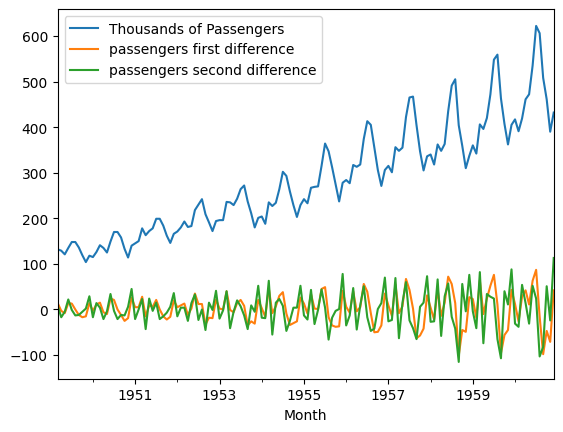

In [29]:
# Still not stationary so performing second Differencing
df_airline['passengers second difference']=df_airline['passengers first difference']-df_airline['passengers first difference'].shift(1)
df_airline.dropna(inplace=True)
df_airline[['Thousands of Passengers','passengers first difference','passengers second difference']].plot()


In [30]:
# Performing Hypothesis test again
adfuller(df_airline['passengers second difference'])[1]

2.7328918500142026e-29